In [1]:
# --- Step 1: Import Libraries ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# --- Step 2: Load Dataset ---
url = "https://raw.githubusercontent.com/nileshely/SuperStore-Dataset-2019-2022/main/superstore_dataset.csv"
df = pd.read_csv(url)

# convert dates
df["order_date"] = pd.to_datetime(df["order_date"])
df["YearMonth"] = df["order_date"].dt.to_period("M")

df.head(10)


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,YearMonth
0,US-2020-103800,2019-01-03,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375,2019-01
1,US-2020-112326,2019-01-04,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,2019-01
2,US-2020-112326,2019-01-04,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625,2019-01
3,US-2020-112326,2019-01-04,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375,2019-01
4,US-2020-141817,2019-01-05,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500,2019-01
5,US-2020-106054,2019-01-06,1/7/2019,Jack O'Briant,Dixon,"Dixon Prang Watercolor Pencils, 10-Color Set w...",Corporate,Office Supplies,Art,South,30605,Athens,Georgia,United States,0.0,5.2398,3,12.780,0.4100,2019-01
6,US-2020-130813,2019-01-06,1/8/2019,Lycoris Saunders,Xerox,Xerox 225,Consumer,Office Supplies,Paper,West,90049,Los Angeles,California,United States,0.0,9.3312,3,19.440,0.4800,2019-01
7,US-2020-167199,2019-01-06,1/10/2019,Maria Etezadi,Global,Global Deluxe High-Back Manager's Chair,Home Office,Furniture,Chairs,South,42420,Henderson,Kentucky,United States,0.0,746.4078,9,2573.820,0.2900,2019-01
8,US-2020-167199,2019-01-06,1/10/2019,Maria Etezadi,Rogers,Rogers Handheld Barrel Pencil Sharpener,Home Office,Office Supplies,Art,South,42420,Henderson,Kentucky,United States,0.0,1.4796,2,5.480,0.2700,2019-01
9,US-2020-167199,2019-01-06,1/10/2019,Maria Etezadi,Ibico,Ibico Hi-Tech Manual Binding System,Home Office,Office Supplies,Binders,South,42420,Henderson,Kentucky,United States,0.0,274.4910,2,609.980,0.4500,2019-01


In [2]:
# --- Step 3: Data Overview ---
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())



Shape: (9994, 20)

Columns: ['order_id', 'order_date', 'ship_date', 'customer', 'manufactory', 'product_name', 'segment', 'category', 'subcategory', 'region', 'zip', 'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales', 'profit_margin', 'YearMonth']

Missing Values:
 order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
YearMonth        0
dtype: int64


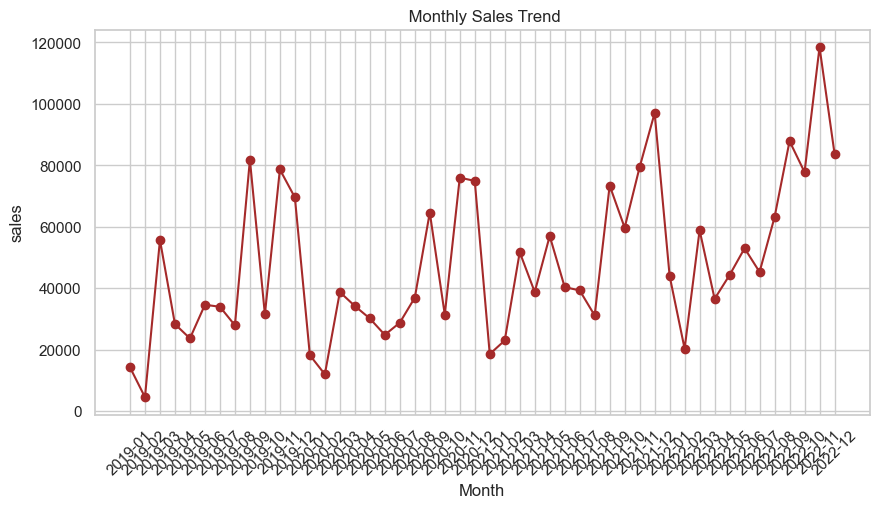

In [3]:
# --- Monthly Sales Trend ---
monthly_sales = df.groupby("YearMonth")["sales"].sum()

plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker="o", color="brown")
plt.title(" Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("sales")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='category'>

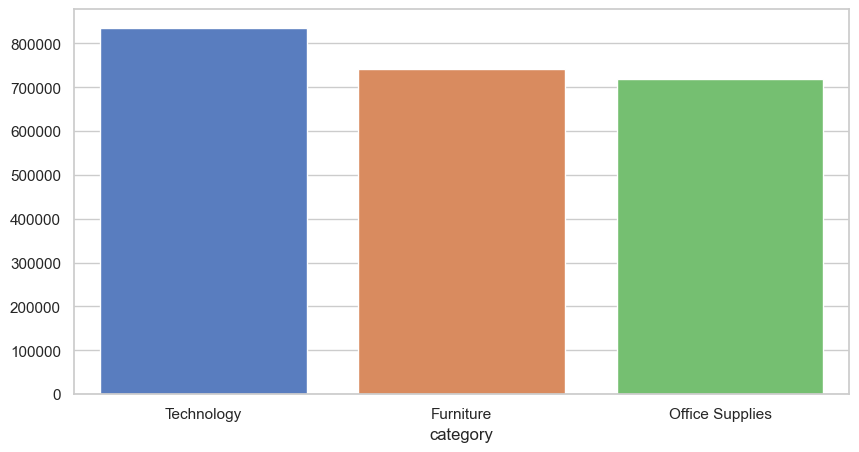

In [4]:
# --- Sales by Category ---
category_sales = df.groupby("category")["sales"].sum().sort_values(ascending=False)

sns.barplot(
    x=category_sales.index,
    y=category_sales.values,
    hue=category_sales.index,     
    palette="muted",
    legend=False
)


<Axes: xlabel='Region', ylabel='Sales'>

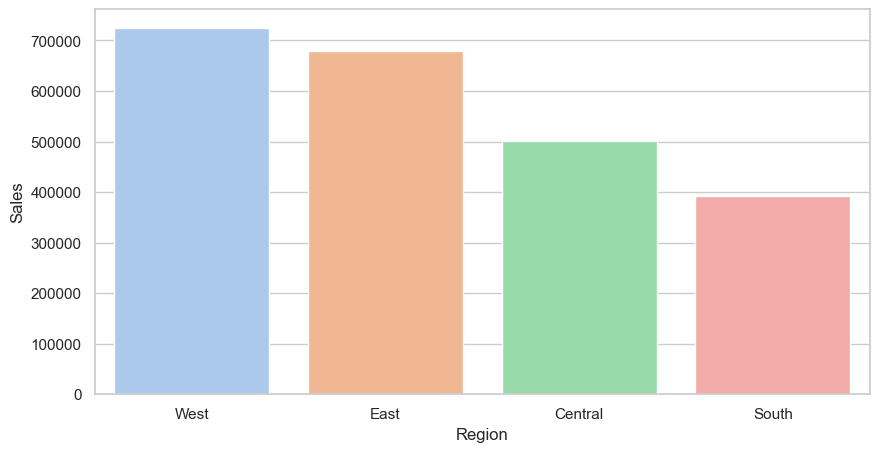

In [11]:
# --- Sales by Region ---
region_sales = df.groupby("region")["sales"].sum().sort_values(ascending=False)

# Convert to DataFrame for seaborn
region_sales_df = region_sales.reset_index()
region_sales_df.columns = ["Region", "Sales"]

# Plot
sns.barplot(
    data=region_sales_df,
    x="Region",
    y="Sales",
    hue="Region",      
    palette="pastel",
    legend=False       


<Axes: ylabel='customer'>

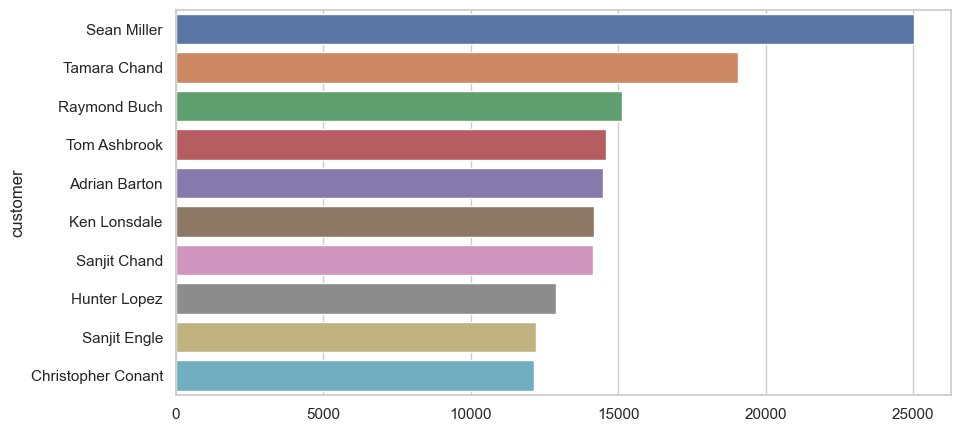

In [6]:
# ---  Top 10 Customers ---
top_customers = df.groupby("customer")["sales"].sum().nlargest(10)

sns.barplot(
    x=top_customers.values,
    y=top_customers.index,
    hue=top_customers.index,   
    palette="deep",
    legend=False               
)


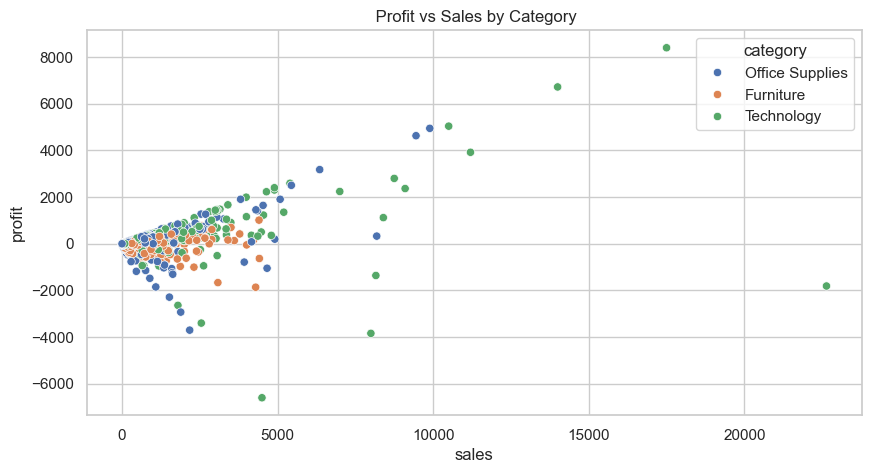

In [7]:
# --- Profitability ---
sns.scatterplot(data=df, x="sales", y="profit", hue="category")
plt.title(" Profit vs Sales by Category")
plt.show()


In [12]:
# --- Business Insights ---
print("Insights:")
print(f"- Highest sales category: {category_sales.idxmax()}")
print(f"- Most profitable region: {region_sales.idxmax()}")
print(f"- Top 10 customers contribute {round(top_customers.sum()/df['sales'].sum()*100,2)}% of total sales")


Insights:
- Highest sales category: Technology
- Most profitable region: West
- Top 10 customers contribute 6.7% of total sales
